In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# install xlrd if missing
# install openpyxl if '.xlsx not supported' error (xlrd only supports xls now)

In [7]:
cc = pd.read_excel('creditcard.xlsx', engine='openpyxl')

In [8]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


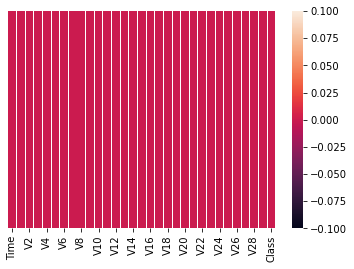

In [19]:
sns.heatmap(cc.isnull(), yticklabels=False)

In [23]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

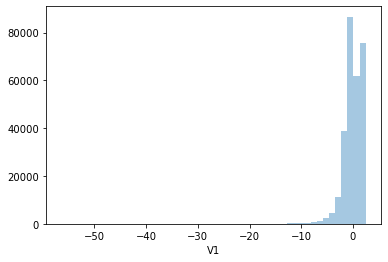

In [29]:
sns.distplot(cc['V1'], kde=False, bins=50)

In [31]:
x=cc.drop(['Time','Class'],axis=1)
y=cc['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [33]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression(max_iter=1000)

In [39]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
predictions_logmodel = logmodel.predict(X_test)

In [53]:
# logistic regression outcomes (method 1)

print(classification_report(y_test, predictions_logmodel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93824
           1       0.88      0.65      0.75       163

    accuracy                           1.00     93987
   macro avg       0.94      0.83      0.87     93987
weighted avg       1.00      1.00      1.00     93987



In [54]:
# TP  FP
# FN  TN
# 93810 tx correctly predicted positive class (not fraud), 14 tx incorrectly predicted positive class
# 57 tx incorrectly predicted negative class,              106 tx correctly predicted negative class (is fraud)
print(confusion_matrix(y_test, predictions_logmodel))

[[93810    14]
 [   57   106]]


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
predictions_dtree = dtree.predict(X_test)

In [56]:
# decision tree outcomes (method 2)

print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93824
           1       0.82      0.83      0.82       163

    accuracy                           1.00     93987
   macro avg       0.91      0.91      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [58]:
# TP  FP
# FN  TN
# 93794 tx correctly predicted positive class (not fraud), 30 tx incorrectly predicted positive class
# 28 tx incorrectly predicted negative class,              135 tx correctly predicted negative class (is fraud)
print(confusion_matrix(y_test, predictions_dtree))

[[93794    30]
 [   28   135]]


In [59]:
rfc = RandomForestClassifier()

In [60]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
predictions_rfc = rfc.predict(X_test)

In [62]:
# random forest outcomes (method 3)

print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93824
           1       0.91      0.84      0.87       163

    accuracy                           1.00     93987
   macro avg       0.95      0.92      0.94     93987
weighted avg       1.00      1.00      1.00     93987



In [63]:
# TP  FP
# FN  TN
# 93810 tx correctly predicted positive class (not fraud), 14 tx incorrectly predicted positive class
# 26 tx incorrectly predicted negative class,              137 tx correctly predicted negative class (is fraud)
print(confusion_matrix(y_test, predictions_rfc))

[[93810    14]
 [   26   137]]
